<img src="./images/banner1.png" width="800" height="150">

# Exploring Classification Models: An Intuitive Approach

In this notebook, we dive into the world of machine learning classification models, offering an intuitive and hands-on approach to understanding and implementing these algorithms. We explore a variety of classification techniques including  **K-Nearest Neighbors (KNN), Decision Trees, and Random Forests**. With clear, interactive code examples and engaging visualizations, this guide makes it easy for beginners to grasp the core concepts behind each model.

Through visual representations of decision boundaries and performance metrics, we aim to provide a deeper understanding of how each model works, when to use it, and how to evaluate its performance. This notebook is designed for those looking to gain practical experience with classification algorithms while seeing their behavior in action.

Whether you're new to machine learning or looking to strengthen your skills, this notebook will guide you step-by-step through the process of building and evaluating classification models using the popular **Scikit-learn** library.





<img src="./images/class2.png" width="800">

**Table of contents**<a id='toc0_'></a>    
- [Introduction to Classification](#toc1_)        
- [The Anatomy of a Classification Task](#toc2_)    
  - [Input Features](#toc2_1_)    
  - [Target Variable (Label)](#toc2_2_)    
  - [Training Data](#toc2_3_)    
  - [Classification Model](#toc2_4_)    
  - [Decision Function](#toc2_5_)    
  - [Loss Function](#toc2_6_)    
  - [Optimization Algorithm](#toc2_7_)    
  - [Evaluation Metrics](#toc2_8_)    
- [Introduction to Scikit-learn](#toc3_) 
  - [Installation](#toc3_1_)
  - [Importing Libraries](#toc3_2_)
  - [Loading a Sample Dataset](#toc3_3_)
  - [Data Preprocessing](#toc3_4_)
  - [Splitting Data into Training and Testing Sets](#toc3_5_)
  - [Building a Classification Model](#toc3_6_)
  - [Making Predictions](#toc3_7_)
  - [Evaluating Model Performance](#toc3_8_)
- [Suport vector machine (SVM)](#toc3_1_)    
  - [How SVM Works](#toc3_2_)    
  - [SVM in Scikit-learn](#toc3_3_)    
  - [Visualizing SVM Decision Boundaries](#toc3_4_)    
- [K-Nearest Neighbors (KNN)](#toc4_)    
  - [How KNN Works](#toc4_1_)    
  - [KNN in Scikit-learn](#toc4_2_)    
  - [Visualizing Decision Boundaries](#toc4_3_)    
- [Decision Trees](#toc5_)
  - [How Decision Trees Work](#toc5_1_)
  - [Decision Trees in Scikit-learn](#toc5_2_)
  - [Visualizing Decision Trees](#toc5_3_)
- [Random Forests](#toc6_)
  - [How Random Forests Work](#toc6_1_)
  - [Random Forests in Scikit-learn](#toc6_2_)
  - [Visualizing Random Forests](#toc6_3_)
- [Case Study: Breast Cancer Classification](#toc7_)
  - [Data Preprocessing](#toc7_1_)
  - [Splitting Data](#toc7_2_)
  - [Building and Evaluating Models](#toc7_3_)
- [Conclusion](#toc8_)
- [References](#toc9_)

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Introduction to Classification](#toc0_)


### ✅ What is Classification?
In machine learning, **classification** is a supervised learning technique used to predict the category or class of new observations based on past data.







Let's formalize the classification problem mathematically:

- Input space: $X$ (feature space)
- Output space: $Y$ (set of possible labels)
- Training data: $\{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$, where $x_i \in X$ and $y_i \in Y$
- Goal: Learn a function $f: X \rightarrow Y$ that accurately predicts labels for new instances

The learned function $f$ should minimize the probability of misclassification on unseen data.

**Example:** Here's the **Iris dataset** example for binary classification using only two classes and two features for better visualization:

<img src="./images/iris.png" width="800">

### 📊 Example Code: Visualizing Binary Classification

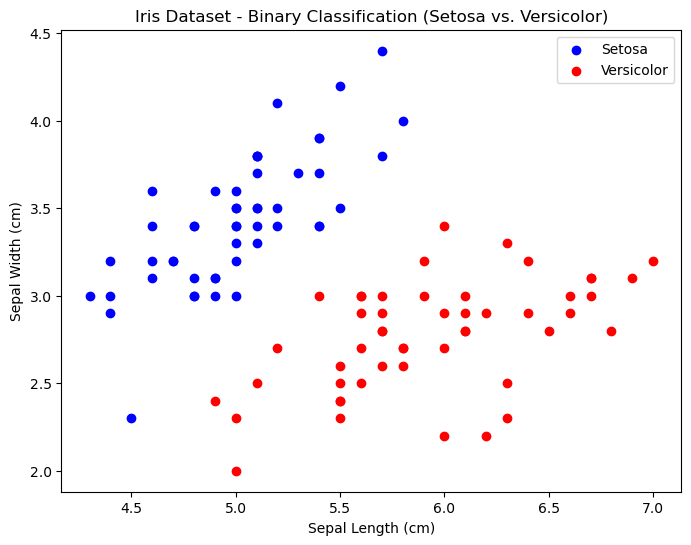

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Select first two features: sepal length & sepal width
y = iris.target

# Filter to make it a binary classification problem (Setosa vs. Versicolor)
binary_mask = y != 2  # Exclude 'Virginica'
X_binary = X[binary_mask]
y_binary = y[binary_mask]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_binary[y_binary == 0][:, 0], X_binary[y_binary == 0][:, 1], 
            color='blue', label='Setosa')
plt.scatter(X_binary[y_binary == 1][:, 0], X_binary[y_binary == 1][:, 1], 
            color='red', label='Versicolor')
plt.title('Iris Dataset - Binary Classification (Setosa vs. Versicolor)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()




### 🎯 Why is Classification Important?
- 📧 **Email Spam Detection** – Identifying spam vs. non-spam emails.
- 🏥 **Medical Diagnosis** – Classifying a diagnosis as positive or negative.
- 💳 **Fraud Detection** – Detecting fraudulent transactions.
- 💡 **Customer Churn Prediction** – Predicting if a customer will leave a service.

### 🔑 Key Terms to Know
- **Features** *(Input Variables)* → Data points used for prediction.
- **Target** *(Label or Class)* → The category the model tries to predict.
- **Supervised Learning** → Training a model using labeled data.

> 🚀 **Next:** Dive into Scikit-learn and see how it simplifies building classification models!
```


## <a id='toc2_'></a>[The Anatomy of a Classification Task](#toc0_)

### <a id='toc2_1_'></a>[Input Features](#toc0_)

<img src="./images/features.png" width="800">

For any classification task, the foundation is the set of input features (predictors or independent variables). These are measurable properties or characteristics of the phenomenon being observed.

- **Definition:** Quantifiable attributes that describe each observation.
- **Types:**
  - Numerical (continuous or discrete)
  - Categorical (nominal or ordinal)
  - Binary
- **Iris Dataset Example:**  
  In the Iris dataset, the input features are:
  - **Sepal Length** (numerical)
  - **Sepal Width** (numerical)
  - **Petal Length** (numerical)
  - **Petal Width** (numerical)

### <a id='toc2_2_'></a>[Target Variable (Label)](#toc0_)

The target variable, or label, is what the model aims to predict. It represents the outcome or class for each data point.

- **Definition:** The outcome variable indicating the class or category of each observation.
- **Iris Dataset Example:**  
  In the Iris dataset, the target variable is the species of the Iris flower, with classes:
  - *Iris-setosa*
  - *Iris-versicolor*
  - *Iris-virginica*

### <a id='toc2_3_'></a>[Training Data](#toc0_)


Training data consists of examples used by the model to learn the mapping between input features and the target variable.

- **Definition:** A dataset that includes both the features and their corresponding labels, used to train the model.
- **Iris Dataset Example:**  
  The Iris dataset is typically divided into a training set (e.g., 80% of the data) and a test set (20% of the data). The training set is used to learn how the four features relate to the three species of Iris.


### <a id='toc2_4_'></a>[Classification Model](#toc0_)


A classification model is an algorithm that learns from the training data to predict the target variable for new data.



<img src="./images/classification-model.png" width="800">

- **Definition:** An algorithm that maps input features to a discrete outcome or class.
- **Iris Dataset Example:**  
  Using the Iris dataset, a Logistic Regression model can be trained to classify each sample into one of the three Iris species. Alternatively, models like Decision Trees or Support Vector Machines can also be applied.

### <a id='toc2_5_'></a>[Decision Function](#toc0_)


The decision function is a component of the classification model that assigns a class label based on computed scores or probabilities.

- **Definition:** A function that evaluates input features and produces a score or probability for each possible class.
- **Iris Dataset Example:**  
  In Logistic Regression applied to the Iris dataset, the decision function calculates the probability of a flower belonging to each species. The species with the highest probability is chosen as the model’s prediction.

### <a id='toc2_6_'></a>[Loss Function](#toc0_)


The loss function quantifies the error between the model's predictions and the actual labels, guiding the training process.

- **Definition:** A mathematical function that measures the discrepancy between predicted and actual values.
- **Iris Dataset Example:**  
  For a Logistic Regression model on the Iris dataset, the Log Loss (or Cross-Entropy Loss) is commonly used to evaluate how well the model is predicting the correct Iris species, penalizing incorrect predictions.

### <a id='toc2_7_'></a>[Optimization Algorithm](#toc0_)


<img src="./images/gradient.jpg" width="600">

The optimization algorithm updates the model’s parameters to minimize the loss function, effectively “learning” from the training data.

- **Definition:** A method for iteratively adjusting model parameters to reduce the loss.
- **Iris Dataset Example:**  
  When training a Logistic Regression model on the Iris dataset, algorithms such as Gradient Descent or LBFGS are used to find the optimal parameter values that minimize the Log Loss.

### <a id='toc2_8_'></a>[Evaluation Metrics](#toc0_)

<img src="./images/classification-metrics.png" width="800">

Evaluation metrics provide quantitative measures to assess the performance of the classification model.

- **Definition:** Criteria used to evaluate how well the model performs on unseen data.
- **Common Metrics:**
  - **Accuracy:** The proportion of correctly classified instances.
  - **Precision:** The ratio of true positive predictions to the total predicted positives.
  - **Recall:** The ratio of true positive predictions to the actual positives.
  - **F1 Score:** The harmonic mean of precision and recall.

## <a id='toc3_'></a>[Introduction to Scikit-learn](#toc0_)

<img src="./images/Scikit.png" width="800">

Scikit-learn was initially developed as a Google Summer of Code project by David Cournapeau in 2007. Since then, it has grown into a collaborative effort, maintained by a vibrant community of developers and contributors worldwide.

The primary purpose of Scikit-learn is to provide efficient, user-friendly, and well-documented implementations of common machine learning algorithms. It covers a wide range of machine learning tasks, including:

1. Supervised learning (e.g., classification, regression)
2. Unsupervised learning (e.g., clustering, dimensionality reduction)
3. Model selection and evaluation
4. Preprocessing and feature engineering

<img src="./images/scikit-learn.png" width="800">

<img src="./images/ml101-steps-to-take-in-a-machine-learning-project.png" width="800">

Scikit-learn is built upon NumPy, SciPy, and Matplotlib, integrating seamlessly with these fundamental libraries of the Python scientific computing ecosystem. This integration allows for efficient numerical operations and easy visualization of results.

### <a id='toc3_1_'></a>[Installation](#toc0_)
To install Scikit-learn, you can use `pip`:

```bash
pip install scikit-learn
```

### <a id='toc3_2_'></a>[Importing Libraries](#toc0_)
Before we dive into building classification models, let's import the necessary libraries:

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
``` 

### <a id='toc3_3_'></a>[Loading a Sample Dataset](#toc0_)
To demonstrate classification models, we'll use the `make_classification` function from Scikit-learn to generate a synthetic dataset with two classes:

```python
iris_data = iris.load_iris()
X = iris_data.data
y = iris_data.target
``` 

### <a id='toc3_4_'></a>[Data Preprocessing](#toc0_)
Before training a model, it's essential to preprocess the data. This may involve scaling features, handling missing values, or encoding categorical variables.

```python
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
``` 

### <a id='toc3_5_'></a>[Splitting Data into Training and Testing Sets](#toc0_)
To evaluate the model's performance, we split the data into training and testing sets:

```python
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
``` 

### <a id='toc3_6_'></a>[Building a Classification Model](#toc0_)
Now, we can build a classification model using Scikit-learn. For example, let's train a Support Vector Machine (SVM) classifier:


```python
from sklearn.SVM import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train) 
``` 

### <a id='toc3_7_'></a>[Making Predictions](#toc0_)
After training the model, we can make predictions on new data:

```python
y_pred = model.predict(X_test)
``` 

### <a id='toc3_8_'></a>[Evaluating Model Performance](#toc0_)
Finally, we evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score:

```python
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
``` 

# <a id='toc3_1_'></a>[Support Vector Machine (SVM)](#toc0_)



<img src="./images/svm.jpg" width="800">


Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification tasks. It is particularly effective in high-dimensional spaces and is versatile due to its ability to handle linear and non-linear data.

### <a id='toc3_2_'></a>[How SVM Works](#toc0_)
- **Objective:** Find the hyperplane that maximizes the margin between classes.
- **Margin:** The distance between the hyperplane and the nearest data points from each class.
- **Support Vectors:** Data points closest to the hyperplane that define the margin.
- **Kernel Trick:** Transforming data into higher dimensions to make it linearly separable.


scikit-learn provides a variety of kernel functions for SVM, including:
- **Linear Kernel:** Suitable for linearly separable data.
- **Polynomial Kernel:** Useful for non-linear data.
- **RBF Kernel:** Effective for non-linear data with many features.
- **Sigmoid Kernel:** Suitable for non-linear data.

### <a id='toc3_3_'></a>[SVM in Scikit-learn](#toc0_)
Scikit-learn provides a simple and efficient implementation of SVM for classification tasks. The `SVC` class is used to create an SVM model, with various parameters to customize the model's behavior.

```python
from sklearn.svm import SVC
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train, y_train)
``` 

### <a id='toc3_4_'></a>[Visualizing SVM Decision Boundaries](#toc0_)

At their core, SVMs are based on a simple yet powerful idea: **finding the best possible decision boundary between classes**. Imagine you have a dataset with two classes plotted on a 2D plane. There might be many lines that can separate these classes, but which one is the best?

<img src="./images/svm-bad-good-margin.png" width="800">

## Large margin classification

<img src="./images/margin.png" width="800">

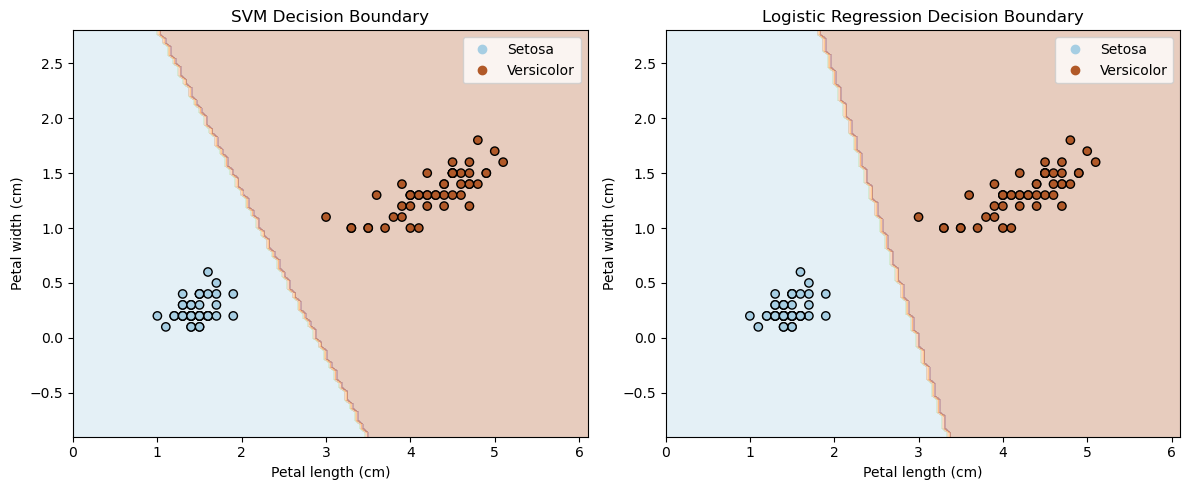

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

# Filter only Setosa and Versicolor (classes 0 and 1)
mask = y != 2  # Exclude Virginica
X = X[mask]
y = y[mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier and logistic regression model
svm_model = SVC(kernel='linear')
logistic_model = LogisticRegression()

# Train the models
svm_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

# Plotting the decision boundaries
plt.figure(figsize=(12, 5))

# Meshgrid for decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Plot SVM decision boundary
plt.subplot(1, 2, 1)
plt.title('SVM Decision Boundary')
Z_svm = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)
plt.contourf(xx, yy, Z_svm, alpha=0.3, cmap=plt.cm.Paired)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, label=['Setosa', 'Versicolor'])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa', 'Versicolor'])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plot Logistic Regression decision boundary
plt.subplot(1, 2, 2)
plt.title('Logistic Regression Decision Boundary')
Z_logistic = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logistic = Z_logistic.reshape(xx.shape)
plt.contourf(xx, yy, Z_logistic, alpha=0.3, cmap=plt.cm.Paired)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, label=['Setosa', 'Versicolor'])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa', 'Versicolor'])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()



# <a id='toc4_'></a>[K-Nearest Neighbors (KNN)](#toc0_)


<img src="./images/knn.png" width="800">

K-Nearest Neighbors (KNN) is a simple yet powerful algorithm used for classification and regression tasks. It is a type of instance-based learning, where the model memorizes the training instances and uses them to classify new data points.

## <a id='toc4_1_'></a>[How KNN Works](#toc0_)
- **Objective:** Classify new data points based on the majority class of their K nearest neighbors.
- **Distance Metric:** Typically Euclidean distance, but other metrics can be used.
- **Hyperparameter K:** Number of neighbors to consider when making predictions.


The 'K' in KNN refers to the number of nearest neighbors used to make predictions.
- if K=1, the algorithm assigns the class of the nearest neighbor to the new data point.
- if K>1, the algorithm considers the class labels of multiple neighbors and uses a majority vote to determine the final prediction.

<img src="./images/instance-based.jpeg" width="800">

Let's consider a basic 2D example to illustrate KNN classification:

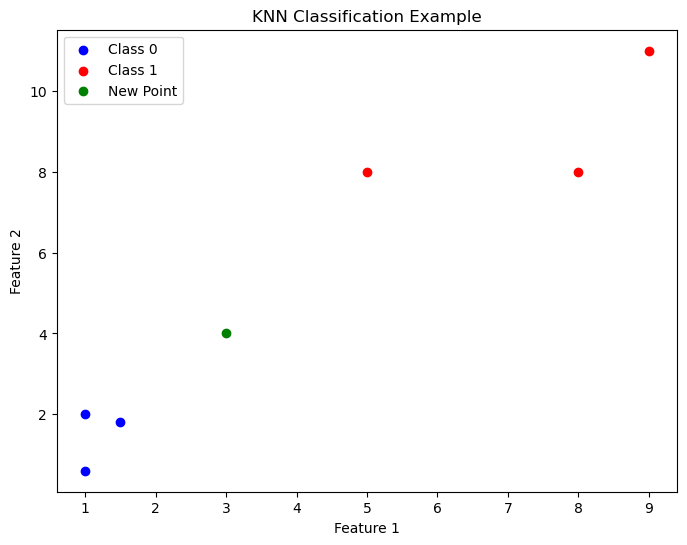

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
y = np.array([0, 0, 1, 1, 0, 1])  # 0: blue class, 1: red class

# New point to classify
new_point = np.array([3, 4])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], color='blue', label='Class 0')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], color='red', label='Class 1')
plt.scatter(new_point[0], new_point[1], color='green', label='New Point')
plt.legend()
plt.title('KNN Classification Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In this example, we have two classes (blue and red) and a new point (green) to classify. The KNN algorithm would determine the class of this new point based on its K nearest neighbors.


## Distance Metrics
The choice of distance metric is crucial in KNN, as it determines how the algorithm calculates the similarity between data points. Common distance metrics include:


<img src="./images/distance-metrics.png" width="800">

## <a id='toc4_2_'></a>[KNN in Scikit-learn](#toc0_)
Scikit-learn provides a straightforward implementation of KNN for classification tasks. The `KNeighborsClassifier` class is used to create a KNN model, with the number of neighbors specified as a parameter.

```python
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)
``` 


## <a id='toc4_3_'></a>[Visualizing Decision Boundaries](#toc0_)
Visualizing the decision boundaries of a classification model can provide valuable insights into how the model separates different classes in the feature space.

In the subsequent sections, we'll delve deeper into how KNN makes these classifications, the importance of distance metrics, and how to implement and optimize KNN for real-world problems.

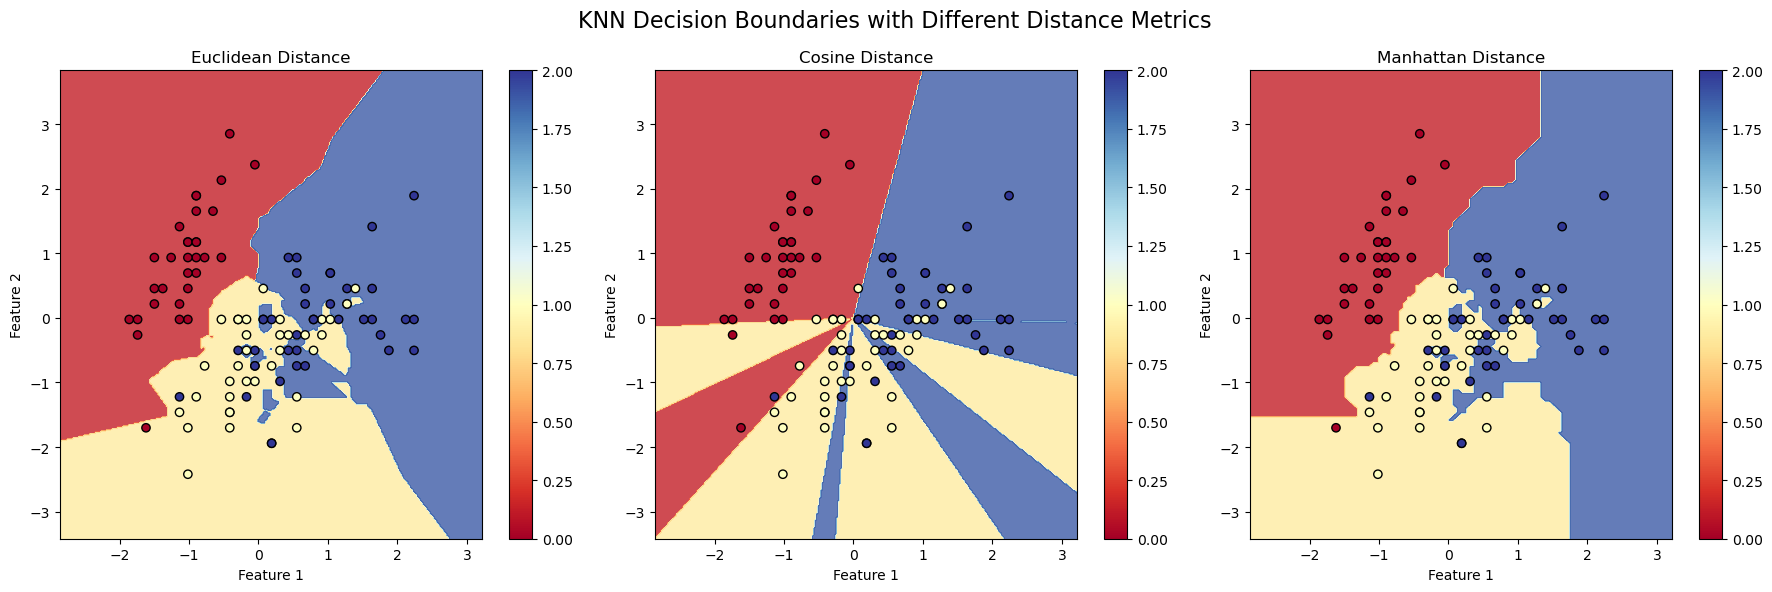

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [0, 1]]  # We'll use only the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the distance metrics and their corresponding KNN classifiers
distance_metrics = ['euclidean', 'cosine', 'manhattan']
classifiers = {
    metric: KNeighborsClassifier(n_neighbors=3, metric=metric)
    for metric in distance_metrics
}

# Train the classifiers
for clf in classifiers.values():
    clf.fit(X_train_scaled, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plot the decision boundaries and scatter plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('KNN Decision Boundaries with Different Distance Metrics', fontsize=16)

for ax, (metric, clf) in zip(axs, classifiers.items()):
    # Plot decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Plot scatter points
    scatter = ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='black')
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'{metric.capitalize()} Distance')

    # Add a color bar
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

## <a id='toc5_'></a>[Decision Trees](#toc0_)


<img src="./images/decision-tree.png" width="800">

### <a id='toc5_1_'></a>[How Decision Trees Work](#toc0_)
- **Objective:** Make decisions by splitting the data based on feature values.
- **Nodes:** Represent decision points based on feature values.
- **Edges:** Connect nodes and represent the outcome of a decision.
- **Leaves:** Terminal nodes that predict the class label.









Decision trees are powerful and intuitive models used in machine learning for both classification and regression tasks. In this lecture, we'll focus on their application in classification problems.

A decision tree is a flowchart-like structure that makes predictions by navigating from the root of the tree to a leaf node, following a path determined by decision rules at each internal node.

Imagine you're playing a game of "20 Questions" to guess an animal. You might start with broad questions like "Is it a mammal?" and gradually narrow down to more specific questions. This process is essentially how a decision tree works!

Decision trees offer several unique advantages:

1. **Interpretability:** They mimic human decision-making processes, making them easy to understand and explain.
2. **Versatility:** They can handle both numerical and categorical data without extensive preprocessing.
3. **Non-linearity:** They can capture complex, non-linear relationships in the data.
4. **Feature importance:** They provide clear insights into which features are most crucial for classification.

Visualizing a decision tree can greatly aid in understanding both the model and the data it's trained on.


### A Simple Example

Let's consider a classic example: predicting whether to play tennis based on weather conditions.

```
                 Outlook
                /   |   \
              /     |     \
           Sunny  Overcast  Rain
           /         |        \
         /           |          \
    Humidity     Play=Yes      Windy
    /     \                   /     \
 High     Normal          Strong   Weak
  |         |               |        |
Play=No   Play=Yes       Play=No   Play=Yes
```


This tree shows how decisions are made based on different weather attributes, leading to a final classification of whether to play tennis or not.

### <a id='toc5_2_'></a>[Decision Trees in Scikit-learn](#toc0_)
Scikit-learn provides a simple and efficient implementation of decision trees for classification tasks. The `DecisionTreeClassifier` class is used to create a decision tree model, with various parameters to customize the model's behavior.

```python
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth=3)
DT_model.fit(X_train, y_train)
```

### <a id='toc5_3_'></a>[Visualizing Decision Trees](#toc0_)
Visualizing a decision tree can provide valuable insights into how the model makes decisions and which features are most important for classification.

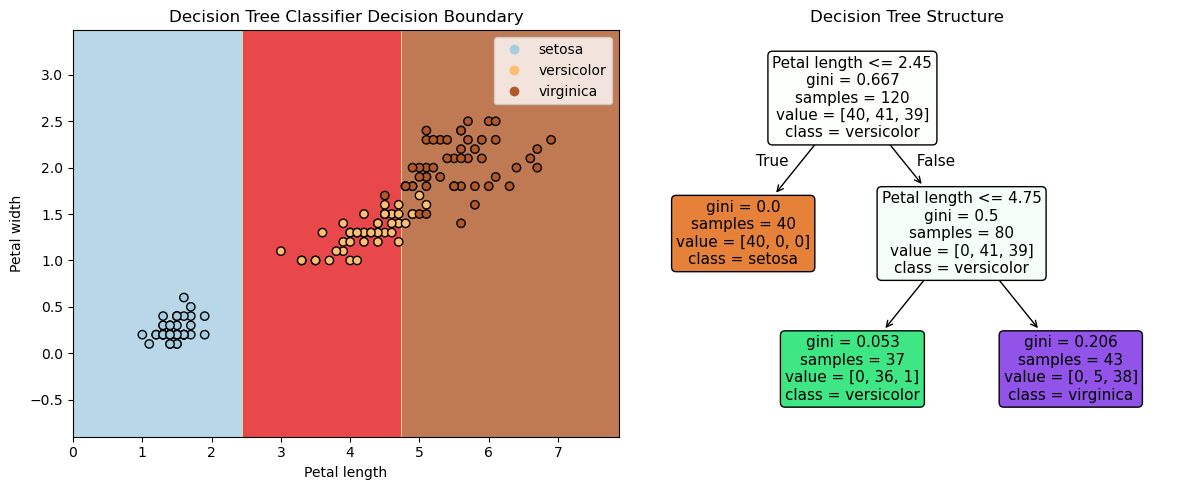

In [4]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

# Load data
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Decision Tree Classifier Decision Boundary')

# Convert array to list for legend labels
unique_classes = np.unique(y)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=iris.target_names[unique_classes].tolist())

# Plot the decision tree
plt.subplot(1, 2, 2)
plot_tree(dt, feature_names=['Petal length', 'Petal width'],
          class_names=iris.target_names, filled=True, rounded=True)
plt.title('Decision Tree Structure')

plt.tight_layout()
plt.show()


## <a id='toc6_'></a>[Random Forests](#toc0_)
<img src="./images/forest.png
" width="800">

### <a id='toc6_1_'></a>[How Random Forests Work](#toc0_)
- **Objective:** Build an ensemble of decision trees to improve prediction accuracy.
- **Bagging:** Training multiple trees on random subsets of the data.
- **Random Feature Selection:** Splitting nodes based on a subset of features.
- **Voting:** Combining predictions from multiple trees to make the final prediction.


Decision trees, while intuitive and interpretable, often suffer from high variance and a tendency to overfit. Random Forests address these limitations by introducing powerful ensemble techniques that maintain the interpretability of decision trees while significantly improving predictive performance. Let's explore this evolution and understand what makes Random Forests special.

Decision trees have several well-known limitations that can impact their performance in real-world applications:

1. **High Variance**
   - Individual trees are sensitive to small changes in the training data
   - Different splits of the data can produce very different trees
   - This instability can lead to poor generalization

2. **Overfitting**
   - Decision trees can easily overfit the training data
   - Trees trained on small datasets or with high complexity can produce highly specific models that don't generalize well

Random Forests, introduced by Leo Breiman in 2001, combine multiple decision trees in a way that reduces overfitting while maintaining the strong predictive capabilities of tree-based methods.

<img src="./images/random-forest.jpg" width="800">

### <a id='toc6_2_'></a>[Random Forests in Scikit-learn](#toc0_)
Scikit-learn provides a robust implementation of Random Forests for classification tasks. The `RandomForestClassifier` class is used to create a Random Forest model, with various parameters to customize the model's behavior.

```python
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100, max_depth=3)
RF_model.fit(X_train, y_train)
``` 

### <a id='toc6_3_'></a>[Visualizing Random Forests](#toc0_)
Visualizing a Random Forest can provide insights into how the ensemble of decision trees works together to make predictions. By examining the individual trees and their combined predictions, we can better understand the model's behavior and performance.

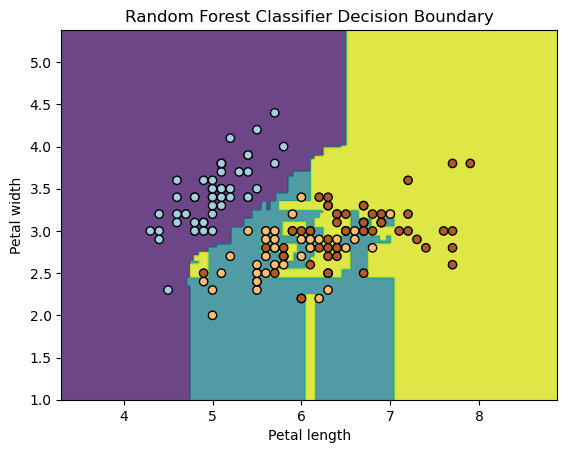

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np  

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [0, 1]]  # petal length and width

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Random Forest Classifier Decision Boundary')
plt.show()

## <a id='toc7_'></a>[Case Study: Breast Cancer Classification](#toc0_)
In this case study, we'll apply classification models to the Breast Cancer Wisconsin dataset, aiming to predict whether a tumor is benign or malignant based on various features.

### <a id='toc7_1_'></a>[Data Preprocessing](#toc0_)
Before building the classification models, we preprocess the data by scaling the features and encoding the target variable.


In [6]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

### <a id='toc7_2_'></a>[Splitting Data](#toc0_)
Next, we split the data into training and testing sets to evaluate the model's performance.

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### <a id='toc7_3_'></a>[Building and Evaluating Models](#toc0_)
We build and evaluate multiple classification models, including SVM, KNN, Decision Trees, and Random Forests, to predict the diagnosis of breast cancer.

In [8]:
# Initialize the classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}


In [9]:
# Train and evaluate the classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.2f}')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=data.target_names, columns=data.target_names)
    print(f'{name} Confusion Matrix:')
    print(cm_df)
    
    # Classification Report
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    print('--------------------------------------------------')

Decision Tree Accuracy: 0.95
Decision Tree Confusion Matrix:
           malignant  benign
malignant         40       3
benign             3      68
Decision Tree Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

--------------------------------------------------
Random Forest Accuracy: 0.96
Random Forest Confusion Matrix:
           malignant  benign
malignant         40       3
benign             1      70
Random Forest Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96 

## <a id='toc8_'></a>[Conclusion](#toc0_)
In this notebook, we explored the world of classification models, from the foundational concepts to practical implementations using Scikit-learn. We covered key algorithms like SVM, KNN, Decision Trees, and Random Forests, providing an intuitive understanding of how they work and when to use them.


## <a id='toc9_'></a>[References](#toc0_)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/index.html)
- [Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)
- [Deep Learning: A Visual Approach](https://www.amazon.com/Deep-Learning-Approach-Andrew-Glassner/dp/1718500726)